In [5]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd
import time, sys, os

# get data / model

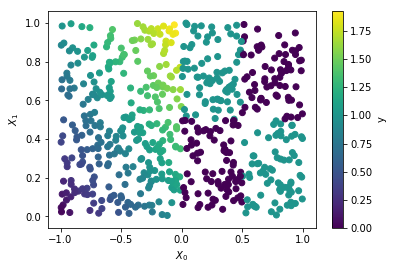

In [50]:
np.random.seed(13)
N = 300
p = 10
X0 = np.random.rand(N, p)
y0 = X0[:, 0] + X0[:, 1]
X0[:, 0] -=1
X1 = np.random.rand(N, p)
y1 = np.logical_xor(X1[:, 0] > 0.5, X1[:, 1] > 0.5) * 1.0
X = np.concatenate((X0, X1))
y = np.concatenate((y0, y1))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.colorbar(label='y')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
m = MLPRegressor(random_state=13)    
m.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=m.predict(X))
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.colorbar(label='prediction')
plt.show()

# so what did this model learn?

*let's begin with a quick scalar importance for each variable*

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(m).fit(X, y)
eli5.show_weights(perm) # stored in perm.feature_importances_

Weight,Feature
1.1533 ± 0.1308,x0
0.7433 ± 0.1252,x1
0.0185 ± 0.0063,x7
0.0174 ± 0.0063,x5
0.0164 ± 0.0058,x6
0.0154 ± 0.0020,x2
0.0152 ± 0.0046,x9
0.0142 ± 0.0010,x3
0.0134 ± 0.0045,x4
0.0129 ± 0.0031,x8


**shap here is very slow**

In [ ]:
# explainer = shap.KernelExplainer(m.predict, X)
# shap_values = explainer.shap_values(X)
# shap.summary_plot(shap_values, X)

## local curves

*we have found that $X_0$ and $X_1$ are the most important variables! Let's look closer at how they affect the model.*

In [ ]:
from pdpbox import pdp
feature_names = ["x" + str(i) for i in range(X.shape[1])]

feature_num = 0
curve0 = pdp.pdp_isolate(model=m, dataset=pd.DataFrame(X, columns=feature_names), model_features=feature_names, 
                        feature=feature_names[feature_num], num_grid_points=50)
pdp.pdp_plot(curve0, feature_name=feature_names[feature_num], plot_lines=True)
plt.show()

feature_num = 1
curve1 = pdp.pdp_isolate(model=m, dataset=pd.DataFrame(X, columns=feature_names), model_features=feature_names, 
                        feature=feature_names[feature_num], num_grid_points=50)
pdp.pdp_plot(curve1, feature_name=feature_names[feature_num], plot_lines=True)
plt.show()

## for one point

In [3]:
import lime, shap

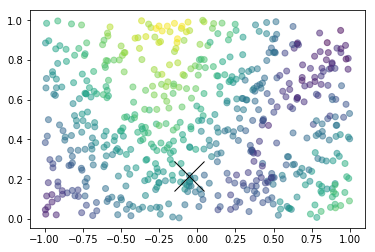

In [80]:
point_to_explain = 2
x = X[point_to_explain]
plt.plot(x[0], x[1], 'x', ms=30, color='black', lw=100)
plt.scatter(X[:, 0], X[:, 1], c=m.predict(X), alpha=0.5)
plt.show()

In [81]:
explainer = shap.KernelExplainer(m.predict, X, link="logit")
# shap_values = explainer.shap_values(X_test, nsamples=100)
shap_values = explainer.shap_values(X[1], nsamples=100)

Using 600 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [83]:
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=feature_names, mode='regression')
lime_explanation = explainer.explain_instance(x, m.predict, num_features=x.size) #, top_labels=1)
# lime_explanation.show_in_notebook(show_table=True)
# lime_explanation.as_list() # give more info on fitted lime values
lime_values = [l[1] for l in lime_explanation.as_list()]

In [90]:
df = pd.DataFrame(np.array([shap_values, lime_values]).T, columns=['shap', 'lime'])

In [91]:
df

,shap,lime
0,-1.251559,0.500631
1,-0.646589,-0.217759
2,0.000000,-0.033935
3,0.000000,-0.018911
4,0.000000,-0.018472
5,0.000000,0.017127
6,0.000000,-0.009832
7,0.000000,-0.008421
8,-0.111200,-0.003888
9,0.000000,0.002924
